## Data Cleaning, Describing, and Visualization

### Step 1 - Get your environment setup

1. Install Git on your computer and fork the class repository on [Github](https://github.com/tfolkman/byu_econ_applied_machine_learning).
2. Install [Anaconda](https://conda.io/docs/install/quick.html) and get it working.

### Step 2 - Explore Datasets

The goals of this project are:

1. Read in data from multiple sources
2. Gain practice cleaning, describing, and visualizing data

To this end, you need to find from three different sources. For example: CSV, JSON, and API, SQL, or web scraping. For each of these data sets, you must perform the following:

1. Data cleaning. Some options your might consider: handle missing data, handle outliers, scale the data, convert some data to categorical.
2. Describe data. Provide tables, statistics, and summaries of your data.
3. Visualize data. Provide visualizations of your data.

These are the typical first steps of any data science project and are often the most time consuming. My hope is that in going through this process 3 different times, that you will gain a sense for it.

Also, as you are doing this, please tell us a story. Explain in your notebook why are doing what you are doing and to what end. Telling a story in your analysis is a crucial skill for data scientists. There are almost an infinite amount of ways to analyze a data set; help us understand why you choose your particular path and why we should care.

Also - this homework is very open-ended and we provided you with basically no starting point. I realize this increases the difficulty and complexity, but I think it is worth it. It is much closer to what you might experience in industry and allows you to find data that might excite you!

# Data from an API source:

The following three datasets contain the median household listing price for all homes in the states of Utah, Colorado, and Idaho.

In [1]:
import quandl
Utahhd= quandl.get('ZILLOW/S44_MLPAH', authtoken='FD4pvTxsHdGVYBWh1UXZ')
Idahohd= quandl.get('ZILLOW/S15_MLPAH', authtoken='FD4pvTxsHdGVYBWh1UXZ')
Coloradohd= quandl.get('ZILLOW/S7_MLPAH', authtoken='FD4pvTxsHdGVYBWh1UXZ')

In [20]:
Utahhd.describe()

,Value
count,54.000000
mean,278497.537037
std,32834.511692
min,230000.000000
25%,249900.000000
50%,284500.000000
75%,299800.000000
max,334900.000000


In [21]:
Idahohd.describe()

,Value
count,95.000000
mean,191988.468421
std,42838.288047
min,132700.000000
25%,149900.000000
50%,190000.000000
75%,225647.000000
max,274900.000000


In [22]:
Coloradohd.describe()

,Value
count,95.000000
mean,297140.278947
std,65523.201871
min,199900.000000
25%,237225.750000
50%,289900.000000
75%,355000.000000
max,408800.000000


Note that the data from each state does not contain the same amount of observations with both Idaho and Colorado beginning before Utah's data. To correct for this, I will merge the dataframes and only keep the datapoints that all three states contain.

In [17]:
import pandas as pd
ui= Utahhd.merge(Idahohd, right_index=True, left_index=True)
uic= ui.merge(Coloradohd, right_index=True, left_index=True)
uic.columns = ['Utah','Idaho','Colorado']
uic.head(6)

,Utah,Idaho,Colorado
Date,,,
2017-06-30,329000.0,273500.0,400000.0
2017-07-31,329500.0,274900.0,406530.0
2017-08-31,329000.0,269900.0,404000.0
2017-09-30,329000.0,269000.0,408800.0
2017-10-31,329900.0,269900.0,407000.0
2017-11-30,334900.0,274900.0,400000.0


In [18]:
#Check that counts are correct across each state
uic.describe()

,Utah,Idaho,Colorado
count,54.000000,54.000000,54.000000
mean,278497.537037,222204.888889,346531.805556
std,32834.511692,30829.644300,39766.696708
min,230000.000000,166763.500000,279000.000000
25%,249900.000000,194675.000000,314962.500000
50%,284500.000000,223950.000000,350000.000000
75%,299800.000000,247971.250000,375000.000000
max,334900.000000,274900.000000,408800.000000


In [19]:
uic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 2013-06-30 to 2017-11-30
Data columns (total 3 columns):
Utah        54 non-null float64
Idaho       54 non-null float64
Colorado    54 non-null float64
dtypes: float64(3)
memory usage: 1.7 KB


In [24]:
#Check for missing values
uic.columns[uic.isnull().any()]

Index([], dtype='object')

There are no missing values from June 2013 to November 2017

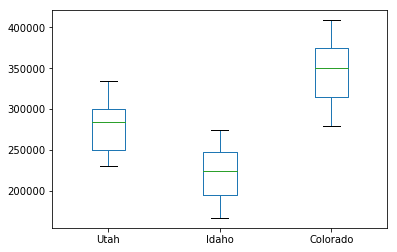

In [25]:
#Look for outliers
import matplotlib.pyplot as plt
%matplotlib inline
uicbox= uic.plot(kind='box')


In [36]:
#Utah Outliers
std_Utah= uic['Utah'].std()
maxoutUtah= (std_Utah*3)+ uic['Utah'].mean()
minoutUtah= uic['Utah'].mean() - (std_Utah*3)
print('Anything beyond {} is an outlier'.format(maxoutUtah))
print('Anything less than {} is an oulier'.format(minoutUtah))
print(uic['Utah'].describe())

Anything beyond 377001.0721136106 is an outlier
Anything less than 179994.00196046344 is an oulier
count        54.000000
mean     278497.537037
std       32834.511692
min      230000.000000
25%      249900.000000
50%      284500.000000
75%      299800.000000
max      334900.000000
Name: Utah, dtype: float64


In [37]:
#Idaho Outliers
std_Idaho= uic['Idaho'].std()
maxoutIdaho= (std_Idaho*3)+ uic['Idaho'].mean()
minoutIdaho= uic['Idaho'].mean() - (std_Idaho*3)
print('Anything beyond {} is an outlier'.format(maxoutIdaho))
print('Anything less than {} is an oulier'.format(minoutIdaho))
print(uic['Idaho'].describe())

Anything beyond 314693.8217894522 is an outlier
Anything less than 129715.95598832554 is an oulier
count        54.000000
mean     222204.888889
std       30829.644300
min      166763.500000
25%      194675.000000
50%      223950.000000
75%      247971.250000
max      274900.000000
Name: Idaho, dtype: float64


In [38]:
#Colorado Outliers
std_Colorado= uic['Colorado'].std()
maxoutColorado= (std_Colorado*3)+ uic['Colorado'].mean()
minoutColorado= uic['Colorado'].mean() - (std_Colorado*3)
print('Anything beyond {} is an outlier'.format(maxoutColorado))
print('Anything less than {} is an oulier'.format(minoutColorado))
print(uic['Colorado'].describe())

Anything beyond 465831.8956800589 is an outlier
Anything less than 227231.7154310522 is an oulier
count        54.000000
mean     346531.805556
std       39766.696708
min      279000.000000
25%      314962.500000
50%      350000.000000
75%      375000.000000
max      408800.000000
Name: Colorado, dtype: float64


There are no outliers in any of the three states